In [11]:
import numpy as np
import pandas as pd
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

# vs报错的处理方法，感觉奇怪，tbc
# include_dirs=[np.get_include()]
import matplotlib as plt

# Read the data.
data = np.asarray(pd.read_csv('l2_9_data.csv', header=None))
## 注意文件名和原文件有差别
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# 阶跃函数
## 解决的是当点不一致时w和b变化方向的问题
## 如果是
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

# 预测函数
## 对X，W做矩阵乘法，并加上b截距
## 结果使用阶跃函数进行0，1输出的转换
def prediction(X, W, b):
    #np.matmul是矩阵乘法，把未知数X和W系数乘起来
    #https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
    
def perceptronStep(X, y, W, b, learn_rate = 0.0001):
    # 对所有行依次进行计算
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.

def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

# 输出line的组合，工作正常，但是可视化的代码其实是在后台
# 这里明白原理在空间上可以看到图（需科学上网）
display(trainPerceptronAlgorithm(X, y))


[(array([-0.05239463]), array([-2.04919443])),
 (array([1.23772563]), array([-2.90815949])),
 (array([-39.47663703]), array([23.57864461])),
 (array([-13.13237331]), array([7.06473087])),
 (array([-9.11612538]), array([4.57527519])),
 (array([-7.79056954]), array([3.96940892])),
 (array([-6.7750263]), array([3.50523881])),
 (array([-5.97212608]), array([3.13826056])),
 (array([-5.32141098]), array([2.84084093])),
 (array([-4.78335796]), array([2.59491529])),
 (array([-4.33103935]), array([2.38817591])),
 (array([-4.09146109]), array([2.3928177])),
 (array([-3.80251597]), array([2.25914697])),
 (array([-3.54414571]), array([2.13962066])),
 (array([-3.31174122]), array([2.03210655])),
 (array([-3.10157551]), array([1.93488045])),
 (array([-2.91060228]), array([1.84653311])),
 (array([-2.73630733]), array([1.76590142])),
 (array([-2.57659722]), array([1.69201691])),
 (array([-2.4297148]), array([1.6240667])),
 (array([-2.29417429]), array([1.56136344])),
 (array([-2.16871083]), array([1.5

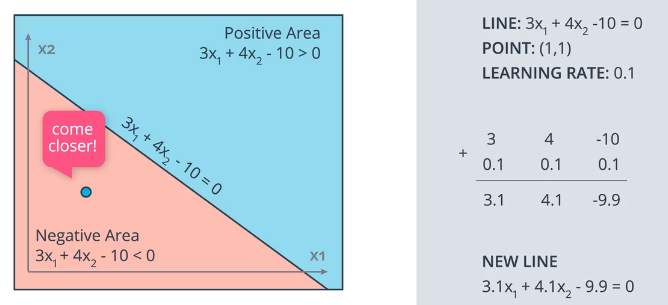
上面输出的就是 boundary lines 每次迭代的结果。是通过这行添加的：
 boundary_lines.append((-W[0]/W[1], -b/W[1]))
 其实就是两个值一个是直线的斜率 -W[0]/W[1]，一个是直线的截距 -b/W[1]
 
 从Data.csv 看，一个数值是这样的：`0.78051,-0.063669,1` 
 - 0.78051 是 W[0]，相当于二维空间里的 x 值。
 - -0.063669 是 W[1]，相当于二维空间里的 y 值。
 - 1 是分类（可选项为 0，1 对应蓝点和红点）
 
 当 boundary_lines.append 记录了所有线的斜率和截距，就可以画出这些线了，可以看出：
 - 虽然初始是随机的，收敛还是可以的（可以调整 learning rate 自己试试区别）